In [68]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision.transforms import (
    Compose, 
    ToTensor, 
    Normalize, 
)
from timm.data import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

from src.data.transforms import (
    generate_patch_bboxes,
    generate_tensor_patches,
    CenterCropPct,
    Shrink,
)

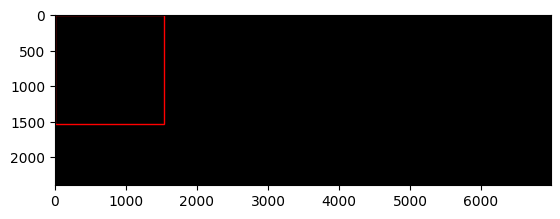

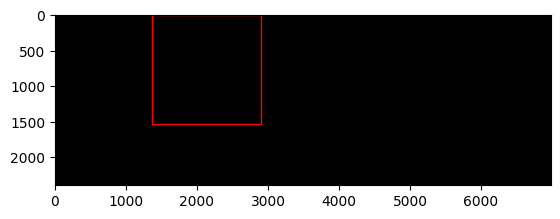

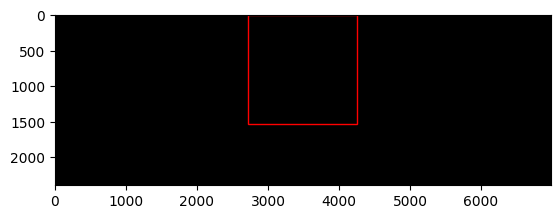

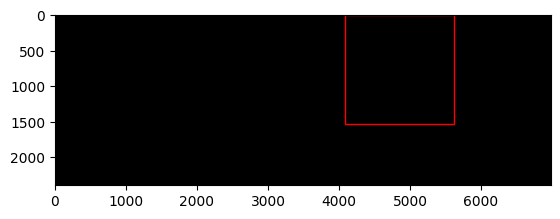

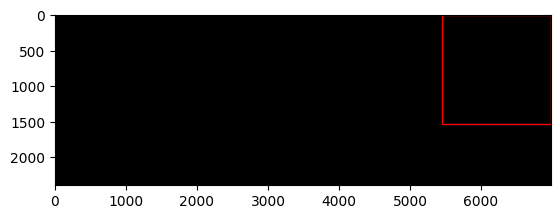

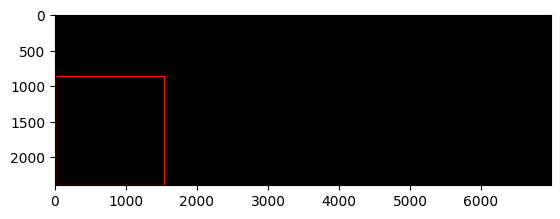

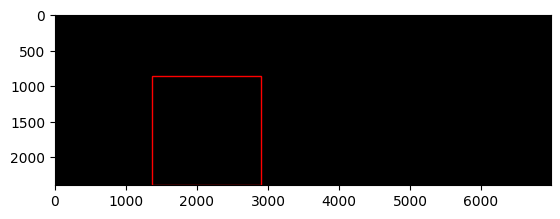

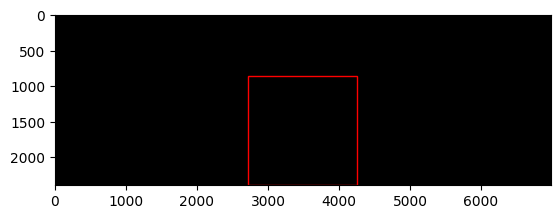

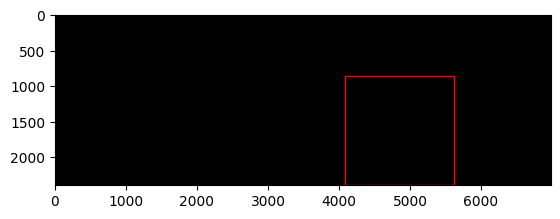

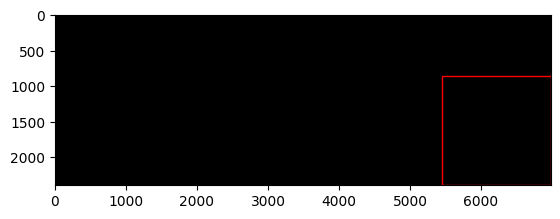

In [59]:
img_size = (2396, 6983)
patch_size = (1536, 1536)

plt.close('all')
img = np.full(img_size, 0, dtype=np.uint8)
for bbox in generate_patch_bboxes(img_size, patch_size):
    h_start, h_end, w_start, w_end = bbox
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.gca().add_patch(
        plt.Rectangle(
            (w_start, h_start),
            w_end - w_start,
            h_end - h_start,
            fill=False,
            edgecolor='red',
        )
    )

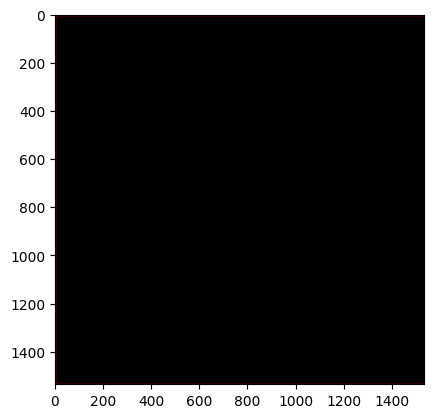

In [60]:
img_size = (1536, 1536)
patch_size = (1536, 1536)

plt.close('all')
img = np.full(img_size, 0, dtype=np.uint8)
for bbox in generate_patch_bboxes(img_size, patch_size):
    h_start, h_end, w_start, w_end = bbox
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.gca().add_patch(
        plt.Rectangle(
            (w_start, h_start),
            w_end - w_start,
            h_end - h_start,
            fill=False,
            edgecolor='red',
        )
    )

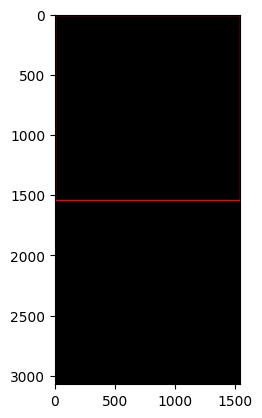

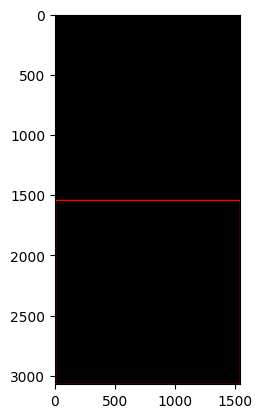

In [61]:
img_size = (1536 * 2, 1536)
patch_size = (1536, 1536)

plt.close('all')
img = np.full(img_size, 0, dtype=np.uint8)
for bbox in generate_patch_bboxes(img_size, patch_size):
    h_start, h_end, w_start, w_end = bbox
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.gca().add_patch(
        plt.Rectangle(
            (w_start, h_start),
            w_end - w_start,
            h_end - h_start,
            fill=False,
            edgecolor='red',
        )
    )

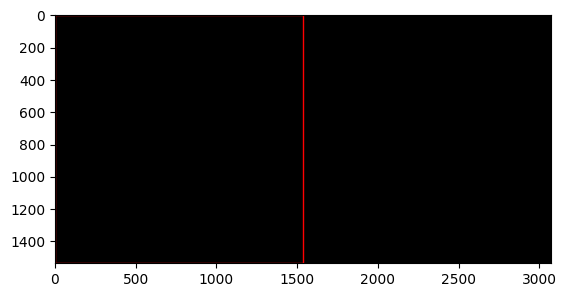

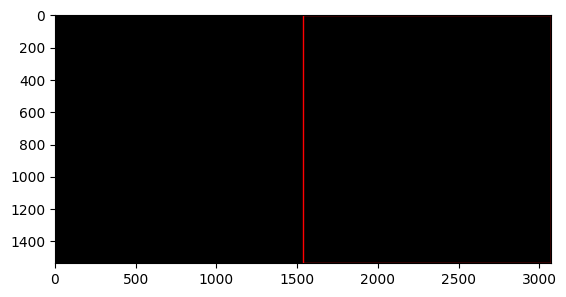

In [62]:
img_size = (1536, 1536 * 2)
patch_size = (1536, 1536)

plt.close('all')
img = np.full(img_size, 0, dtype=np.uint8)
for bbox in generate_patch_bboxes(img_size, patch_size):
    h_start, h_end, w_start, w_end = bbox
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.gca().add_patch(
        plt.Rectangle(
            (w_start, h_start),
            w_end - w_start,
            h_end - h_start,
            fill=False,
            edgecolor='red',
        )
    )

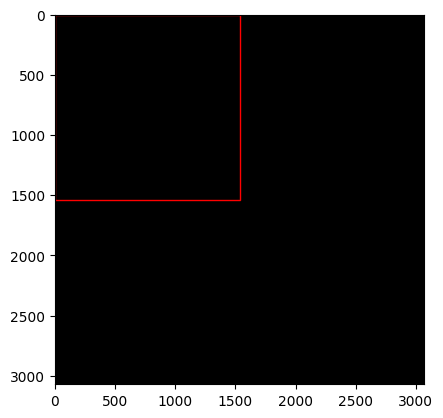

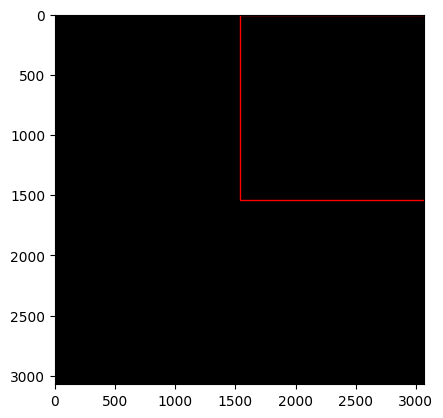

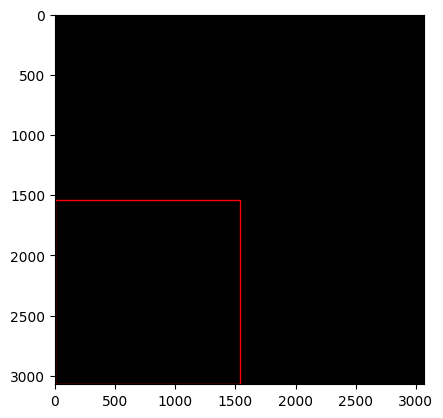

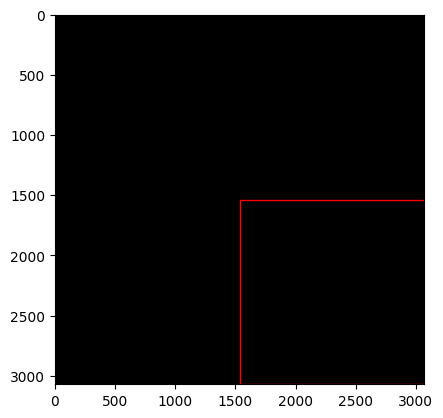

In [63]:
img_size = (1536 * 2, 1536 * 2)
patch_size = (1536, 1536)

plt.close('all')
img = np.full(img_size, 0, dtype=np.uint8)
for bbox in generate_patch_bboxes(img_size, patch_size):
    h_start, h_end, w_start, w_end = bbox
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.gca().add_patch(
        plt.Rectangle(
            (w_start, h_start),
            w_end - w_start,
            h_end - h_start,
            fill=False,
            edgecolor='red',
        )
    )

In [69]:
img = Image.open('/workspace/data/images_page_4/0/00shcdng.png')
img_mean = (238, 231, 234)  # from all train data
pre_transform = Compose(
    [
        CenterCropPct(size=(0.9, 0.9)),
        Shrink(scale=8, fill=img_mean),
        ToTensor(),
        Normalize(mean=torch.tensor(IMAGENET_DEFAULT_MEAN),std=torch.tensor(IMAGENET_DEFAULT_STD))
    ]
)

In [79]:
img_transformed = pre_transform(img).unsqueeze(0)
patch_size = (1536, 1536)
print(img_transformed.shape, img_transformed.shape[2] // patch_size[0] + 1, img_transformed.shape[3] // patch_size[1] + 1)

torch.Size([1, 3, 3336, 5456]) 3 4


In [ ]:
plt.close('all')
img = np.full(img_size, 0, dtype=np.uint8)
for bbox in generate_patch_bboxes(img_size, patch_size):
    h_start, h_end, w_start, w_end = bbox
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.gca().add_patch(
        plt.Rectangle(
            (w_start, h_start),
            w_end - w_start,
            h_end - h_start,
            fill=False,
            edgecolor='red',
        )
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

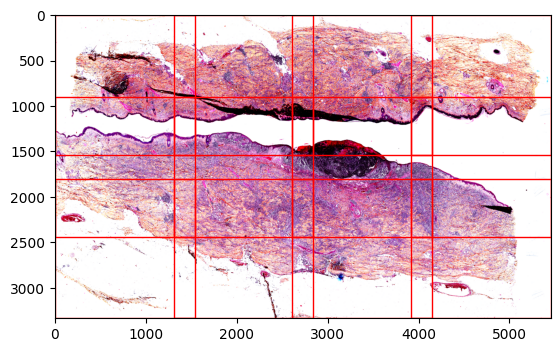

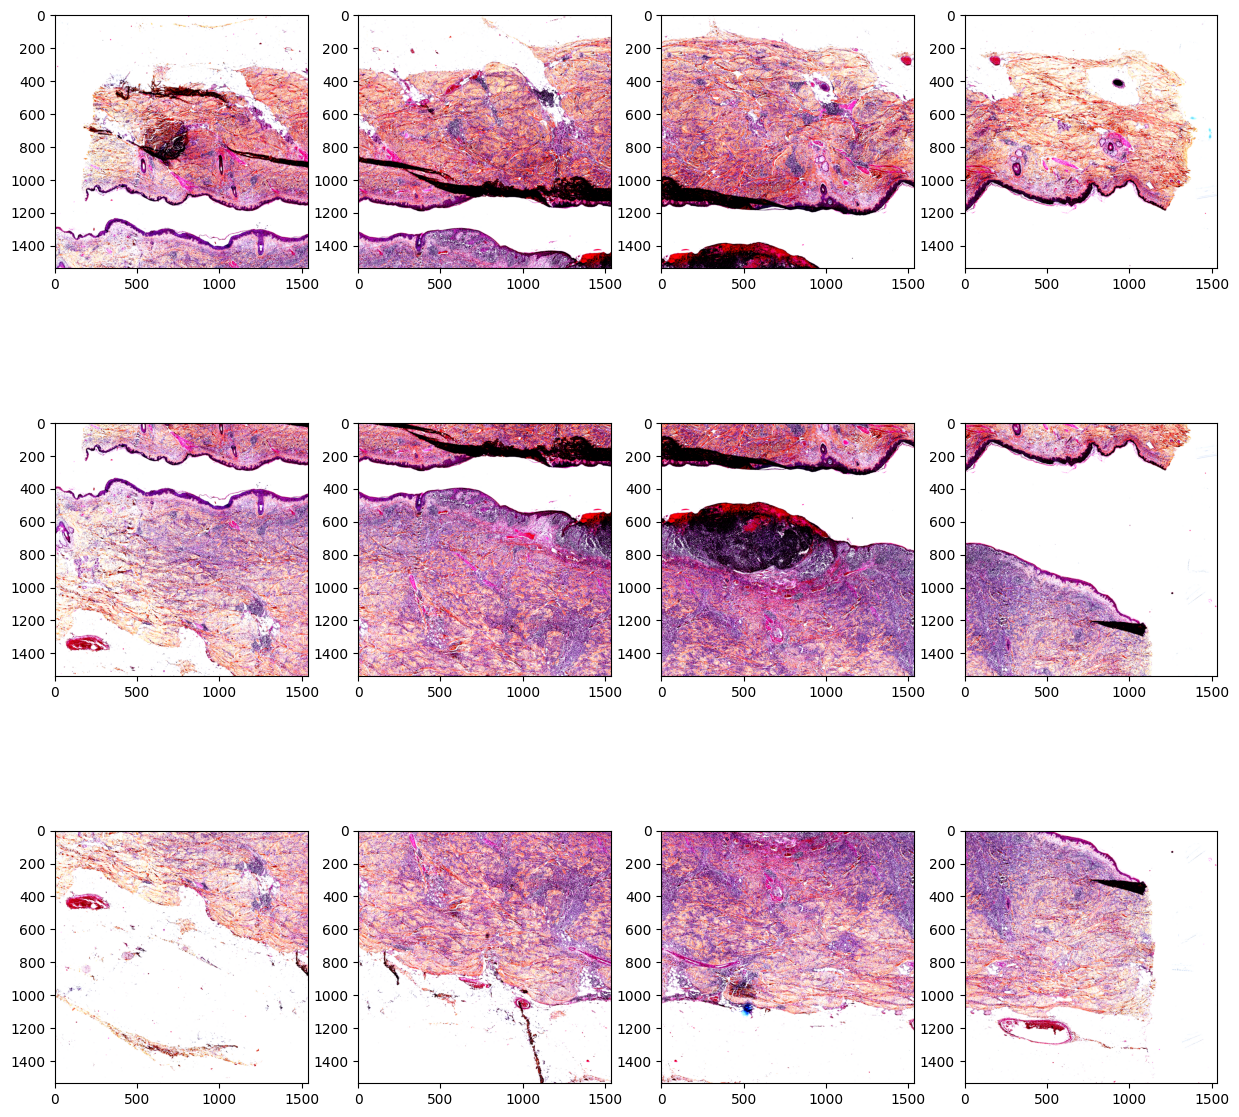

In [82]:
plt.close('all')

plt.imshow(img_transformed[0].permute(1, 2, 0))
for bbox in generate_patch_bboxes((img_transformed.shape[2], img_transformed.shape[3]), patch_size):
    h_start, h_end, w_start, w_end = bbox
    plt.gca().add_patch(
        plt.Rectangle(
            (w_start, h_start),
            w_end - w_start,
            h_end - h_start,
            fill=False,
            edgecolor='red',
        )
    )

fig, axes = plt.subplots(
    img_transformed.shape[2] // patch_size[0] + 1, 
    img_transformed.shape[3] // patch_size[1] + 1, 
    figsize=(15, 15)
)
axes = axes.flatten()
for patch, ax in zip(
    generate_tensor_patches(
        img_transformed, 
        patch_size, 
        fill=(np.array(img_mean) / 255.0).mean()
    ),
    axes
):
    h_start, h_end, w_start, w_end = bbox
    ax.imshow(patch[0].permute(1, 2, 0))